<a href="https://colab.research.google.com/github/MathewsJosh/Topicos-Computacao-Cientifica-II/blob/main/Aula_02_Transforma%C3%A7%C3%B5es_Geom%C3%A9tricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transformações Geométricas

Veremos como realizar algumas transformações geométricas utilizando OpenCV.

## 1 - Leitura da imagem

Começamos com os procedimentos já vistos na aula anterior para importação de bibliotecas e leitura da imagem.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


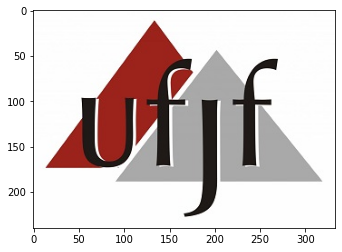

In [2]:
import cv2 as cv
import numpy as np
import math #será necessária para calcular funções trigonométricas
from matplotlib import pyplot as plt

image = cv.imread("/content/drive/MyDrive/ColabFiles/Logo_da_UFJF.jpg")

image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

%matplotlib inline

plt.imshow(image)
plt.show()

## 2 - Transformação de escala

O OpenCV possui o método `resize`, específico para realizar escala. Esse método recebe como parâmetros a imagem de origem, a dimensão da imagem destino, os fatores de escala (opcionais) e o método de interpolação (opcional, bilinear por *default*). Retorna a imagem destino.



(240, 333, 3)


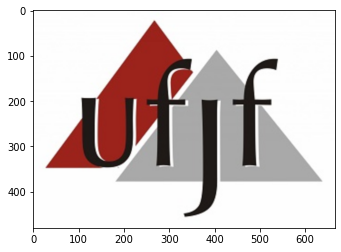

In [3]:
print(image.shape)
height, width = image.shape[:2] # Até o segundo item da tupla

#observe que image.shape[1] corresponde a largura da imagem
resized2 = cv.resize(image, (width*2, height*2)) 

plt.imshow(resized2)
plt.show()

(120, 166, 3)


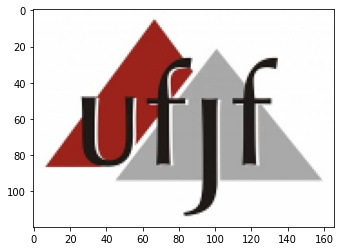

In [85]:
#para utilizar os farores de escala, devemos passar as dimensões da imagem destino como (0,0)
resized0_5 = cv.resize(image, (0,0), fx = 0.5, fy = 0.5) 

print(resized0_5.shape)

plt.imshow(resized0_5)
plt.show()

### 2.1 - Exercício
Compare os diferentes métodos de interpolação e salve as imagens de saída para melhor analisar os resultados.

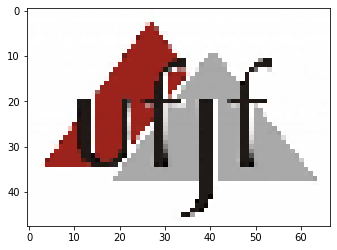

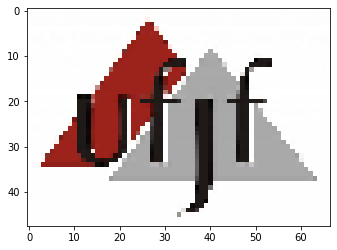

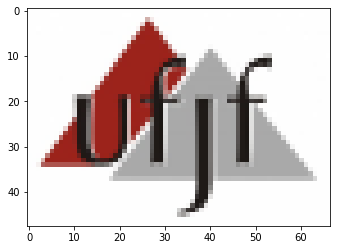

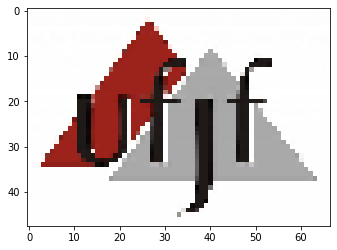

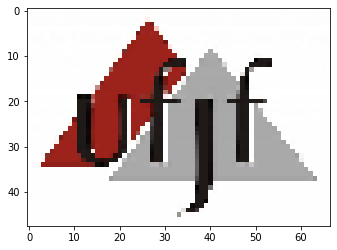

In [5]:
resizedNearest = cv.resize(image, (0,0), fx = 0.2, fy = 0.2, interpolation = cv.INTER_NEAREST)
resizedLinear = cv.resize(image, (0,0), fx = 0.2, fy = 0.2, interpolation = cv.INTER_LINEAR)
resizedArea = cv.resize(image, (0,0), fx = 0.2, fy = 0.2, interpolation = cv.INTER_AREA)
resizedCubic = cv.resize(image, (0,0), fx = 0.2, fy = 0.2, interpolation = cv.INTER_CUBIC)
resizedLanc = cv.resize(image, (0,0), fx = 0.2, fy = 0.2, interpolation = cv.INTER_LANCZOS4)

plt.imshow(resizedNearest)
plt.show()
plt.imshow(resizedLinear)
plt.show()
plt.imshow(resizedArea)
plt.show()
plt.imshow(resizedCubic)
plt.show()
plt.imshow(resizedLanc)
plt.show()

# INTER_NEAREST – a nearest-neighbor interpolation
# INTER_LINEAR – a bilinear interpolation (used by default)
# INTER_AREA – resampling using pixel area relation. It may be a preferred method for image decimation, as it gives moire’-free results. But when the image is zoomed, it is similar to the INTER_NEAREST method.
# INTER_CUBIC – a bicubic interpolation over 4×4 pixel neighborhood
# INTER_LANCZOS4

## 3 - Transformações de translação e rotação

Para as transformações de translação e rotação utilizaremos o método `warpAffine`. Esse método recebe como parâmetros:

*   a imagem de origem 
* a matriz 2x3 da transformação (matriz afim sem a terceira linha)
* a dimensão da imagem destino
* o método de interpolação
* o modo de borda, ou seja, como serão tratados os pontos fora da imagem (por *default*, são definidos como constante)
* o valor de borda (por *default*, é definido como 0)


### 3.1 Translação

Para realizar a transformação precisamos criar uma matriz de números reais utilizando o método `float32` da biblioteca NumPy e depois aplicamos o método `warpAffine` do OpenCV.

[Booleanox, Booleanoy, value]
[[ 1.  0. 50.]
 [ 0.  1. 30.]]


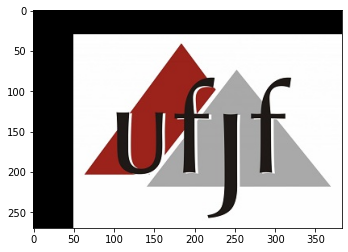

In [6]:
M = np.float32([[1,0,50],[0,1,30]]) # Transformation matrix - Representa a posição em pixels em que a imagem será posicionada

print("[Booleanox, Booleanoy, value]")
print(M)

#observe que é preciso ajustar a dimensão da imagem de saída
translated = cv.warpAffine(image, M, (width+50, height+30)) # Mais detalhes aqui: https://theailearner.com/tag/cv2-warpaffine/
#pelo o que eu entendi, o warp está "compensando" as regiões que agora não possuem mais a imagem (fundo preto)

plt.imshow(translated)
plt.show()

### 3.2 Rotação

No caso da rotação, o OpenCV possui o método `getRotationMatrix2D` que permite a obtenção da matriz de rotação, passando os seguintes parâmetros:

* Centro da rotação
* Ângulo de rotação (em graus)
* Fator de escala isotrópico (mesmo para ambas as direções)

Observe que a matriz permite definir rotações fora da origem e realizar uma escala.

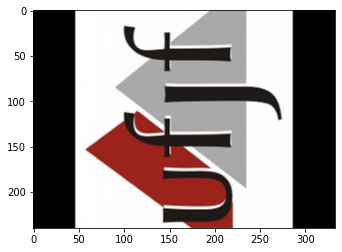

In [87]:
center = (width/2, height/2)

M = cv.getRotationMatrix2D(center, 90, 1)

rotated = cv.warpAffine(image, M, (width, height))

plt.imshow(rotated)
plt.show()

Observe que a imagem apareceu "cortada". Como podemos corrigir esse problema?

### 3.3 - Exercícios

Realize a rotação da imagem por um ângulo de 45° em torno do centro, sem utilizar o método `getRotationMatrix`. Para isso você precisará compor transformações, ou seja, multiplicar matrizes de diversas transformações (translações e rotações).

Algumas dicas:
* Você precisará compor duas translações e uma rotação
* math.cos e math.sin podem ser utilizadas para determinar as funções trigonométricas
* Você precisará utilizar matrizes 3x3 para realizar a composição (confira nos slides)
* O operador @ pode ser utilizado para multiplicar matrizes NumPy (também existe o método `matMul`)
* Para aplicar a transformação afim, você precisará utilizar a submatriz 2x3

A fórmula para rotação em torno da origem é dada por: <br>
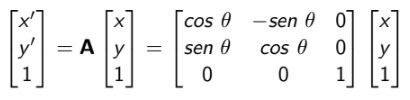

Mais detalhes de como funciona a função getRotationMatrix: https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#:~:text=getRotationMatrix2D()

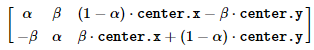

Translação da imagem


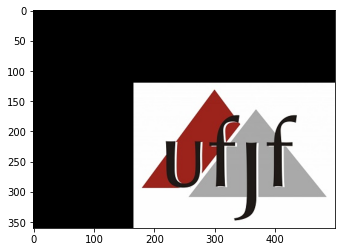

Rotação da imagem
[[  0.52532196   0.8509035  166.        ]
 [ -0.8509035    0.52532196 120.        ]]


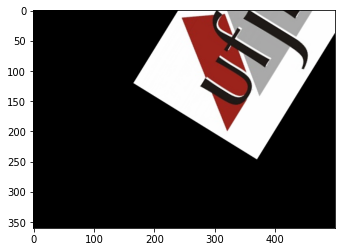

Translação 2 da imagem


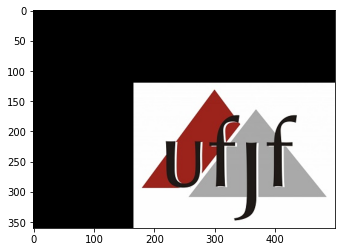

In [91]:
print("Translação da imagem")
height, width = image.shape[:2] # Até o segundo item da tupla
center = (int(width/2), int(height/2))
novox, novoy = center
MatrixTranslacao = np.float32([[1,0,novox],[0,1,novoy]]) # Transformation matrix - Representa a posição em pixels em que a imagem será posicionada
translated = cv.warpAffine(image, MatrixTranslacao, (width+novox, height+novoy))
plt.imshow(translated)
plt.show()

print("Rotação da imagem")
angulo, escala = 45, 1
cos = np.cos(angulo) * escala
sen = np.sin(angulo) * -escala
MatrizRotacao = np.float32([[cos,-sen,0],[sen,cos,0],[0,0,1]])
multTransRot = np.matmul(MatrixTranslacao, MatrizRotacao)
print(multTransRot)

rotated2 = cv.warpAffine(image, multTransRot, (width+novox, height+novoy))

plt.imshow(rotated2)
plt.show()

print("Translação 2 da imagem")
center = (int(width/2), int(height/2))
novox, novoy = center
MatrixTranslacao = np.float32([[1,0,novox],[0,1,novoy]]) # Transformation matrix - Representa a posição em pixels em que a imagem será posicionada
translated = cv.warpAffine(image, MatrixTranslacao, (width+novox, height+novoy))
plt.imshow(translated)
plt.show()

[[  0.52532196   0.8509035  166.        ]
 [ -0.8509035    0.52532196 120.        ]
 [  0.           0.           1.        ]]
[[  0.70710678   0.70710678 -36.23253942]
 [ -0.70710678   0.70710678 152.52691193]]
0.7071067811865476
0.7071067811865475
240 405


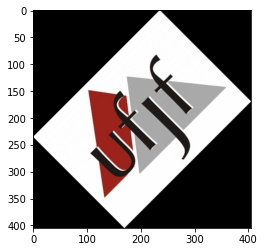

In [93]:
def rotate_bound(image, angle): #Link para conferência: https://www.pyimagesearch.com/2017/01/02/rotate-images-correctly-with-opencv-and-python/
    # grab the dimensions of the image and then determine the
    # center
    (h, w) = image.shape[:2]
    (cX, cY) = (w // 2, h // 2)
    # grab the rotation matrix (applying the negative of the
    # angle to rotate clockwise), then grab the sine and cosine
    # (i.e., the rotation components of the matrix)
    height, width = image.shape[:2] # Até o segundo item da tupla
    center = (int(width/2), int(height/2))
    novox, novoy = center
    angulo, escala = 45, 1
    cos = np.cos(angulo) * escala
    sen = np.sin(angulo) * -escala
    MatrixTranslacao = np.float32([[1,0,novox],[0,1,novoy],[0,0,1]])
    MatrizRotacao = np.float32([[cos,-sen,0],[sen,cos,0],[0,0,1]])
    multTransRot = np.matmul(MatrixTranslacao, MatrizRotacao)
    print(multTransRot)
    M = cv.getRotationMatrix2D((cX, cY), -angle, 1.0)
    print(M)
    cos = np.abs(M[0, 0])
    print(cos)
    sin = np.abs(M[0, 1])
    print(sin)

    # compute the new bounding dimensions of the image
    nW = int((h * sin) + (w * cos))
    print(height, nW)
    nH = int((h * cos) + (w * sin))
    # adjust the rotation matrix to take into account translation
    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - cY
    print
    # perform the actual rotation and return the image
    return cv.warpAffine(image, M, (nW, nH))

imagemmm = rotate_bound(image,-45)
plt.imshow(imagemmm)
plt.show()

Realize transformações de escala com fator de escala -1 para alguma das dimensões. Qual o efeito dessa transformação?

R - A imagem fica do lado oposto ao que se era esperado. Ou seja, a rotação passa a ser no sentido oposto.